# Классификация изображений

1.	Загрузите датасет Olivetti faces;
2.	Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.


In [14]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

3.	Выведите информацию о количественных параметрах датасета;

In [15]:
faces.images.shape

(400, 64, 64)

4.	Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

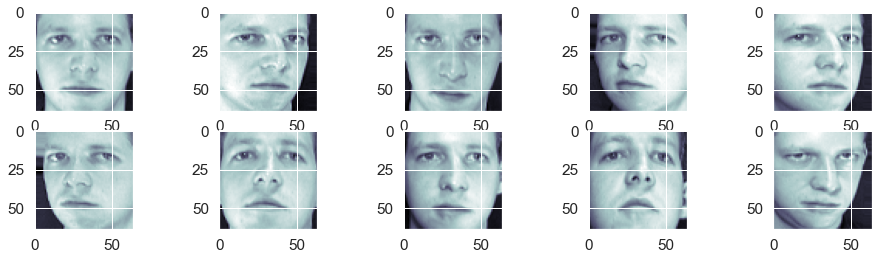

In [16]:
from matplotlib import pyplot as plt

pic_box = plt.figure(figsize=(16,4))
for i in range(10):
    pic_box.add_subplot(2,5,i+1)
    plt.imshow(faces.images[i], cmap=plt.cm.bone)

5.	Разделите эти данные на тестовую и обучающую выборки;

In [31]:
from sklearn.model_selection import train_test_split

x = faces.data
y = faces.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6)

6.	Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;

In [32]:
%%time
from sklearn import svm

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(x_train, y_train)

Wall time: 64.6 ms


SVC()

7.	Оцените качество модели на тестовой выборке с помощью следующих метрик:
    
    a.	достоверность предсказания (accuracy);
    
    b.	точность (precision);
    
    c.	полнота (recall);


In [33]:
import seaborn as sn
import pandas as pd

#import warnings
#warnings.filterwarnings('ignore')

def print_report(model, X, Y):
    """
    Функция для печати отчета по моделе:
    - Матрица ошибки
    - Текстовый отчет по основным метрикам
    ---------------------------------------
    > model - переменная модели из библиотеки sklearn
    > X - матрица признаков
    > Y - матрица правильных ответов
    """
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sn
    
    y_pred = model.predict(X)
    matrix = confusion_matrix(y_pred, Y)
        
    df_matrix = pd.DataFrame(matrix, range(matrix.shape[0]), range(matrix.shape[0]))
    
    plt.figure(figsize = (16,10))
    sn.set(font_scale=1.4)
    sn.heatmap(df_matrix, annot=True, annot_kws={"size": 5})
    print(classification_report(y_pred,Y))

C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vsevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      1.00      0.44         2
           2       1.00      0.14      0.25        28
           3       0.80      0.18      0.30        22
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         6
           6       0.71      1.00      0.83         5
           7       0.75      0.75      0.75         4
           8       1.00      0.29      0.44        14
           9       0.14      1.00      0.25         1
          10       1.00      1.00      1.00         4
          11       0.00      0.00      0.00         0
          12       0.80      0.40      0.53        10
          13       0.00      0.00      0.00         0
          14       1.00      0.71      0.83         7
          15       0.43      1.00      0.60         3
          16       0.67      0.57      0.62         7
          17       1.00    

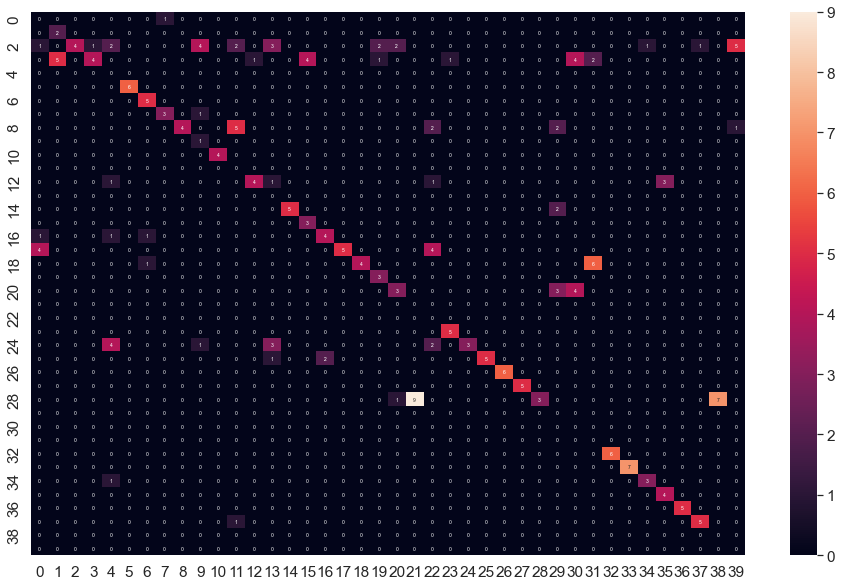

In [34]:
print_report(clf_rbf, x_test, y_test)

8.	Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

In [35]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1),data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none', facecolor=lines[0].get_color(), alpha=0.2)

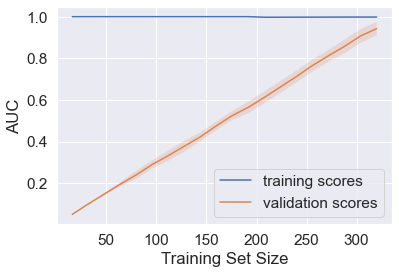

In [36]:
from sklearn.model_selection import learning_curve
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

def plot_learning_curve(model, X, y):
    train_sizes = np.linspace(0.05, 1, 20)
    
    #logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=degree)),('sgd_logit', SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha))])
    
    N_train, val_train, val_test = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size')
    plt.ylabel('AUC')
    plt.legend()

plot_learning_curve(clf_rbf, x, y)